Dataset Link:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

# Back Customer Churn Dataset Analysis

Check and import the necessary libraries

In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
os.getcwd()
filename=input("File Location:")
filename=filename+'.csv'

'C:\\Users\\Sam Jones\\Desktop'

Check time to read data using pandas

In [73]:
%%time
churn_data=pd.read_csv(filename)

Wall time: 51 ms


Check time to read data using dask.dataframe

In [39]:
%%time
churn_data=dask.dataframe.read_csv(filename)

Wall time: 30 ms


Sample and analyse head and tail of data

In [40]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


We cannot use data read using dask.dataframe for this

In [48]:
churn_data_random=churn_data.sample(1000)
churn_data_random.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6386,6387,15584090,Jen,621,Spain,Female,40,7,0.00,2,0,1,131283.60,1
1654,1655,15667134,Cisneros,446,France,Male,32,8,0.00,2,0,0,133292.94,0
7171,7172,15744273,Waterhouse,637,Germany,Male,30,6,122641.56,2,1,0,65618.01,0
4155,4156,15708003,Aleksandrova,587,Spain,Male,41,8,85109.21,1,1,0,1557.82,0
6011,6012,15783007,Parker,520,Germany,Female,45,1,123086.39,1,1,1,41042.40,1
6236,6237,15719649,Lambie,553,France,Male,38,3,99844.68,1,0,0,187915.70,0
3179,3180,15685536,Chu,552,France,Female,34,5,0.00,2,1,1,1351.41,0
3909,3910,15726487,P'eng,431,France,Male,63,6,160982.89,1,1,1,168008.17,0
6470,6471,15616630,Tobenna,583,Germany,Female,41,5,77647.60,1,1,0,190429.52,0
7005,7006,15726466,Esposito,751,France,Male,43,1,114974.24,1,1,0,125920.54,0


Check the structure ,column names and data types of the columns

In [49]:
print ("Rows     : ",churn_data.shape[0])
print ("Columns  : ",churn_data.shape[1])
print ("Elements : ",churn_data.size)

Rows     :  10000
Columns  :  14
Elements :  140000


In [53]:
colnames=churn_data.columns.tolist()
print("Column Names :",colnames)
print("Data Type of Columns :\n ",churn_data.dtypes)

Column Names : ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Data Type of Columns :
  RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


Find the count of rows and ratio of rows with missing values 

In [62]:
missing_count=churn_data.isnull().sum(axis=0)
ratio_na_rows=missing_count.sum()/churn_data.shape[0]
print("Missing Values :\n",missing_count)


Missing Values :
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Findout whether data is already clean or needs to be cleaned

In [63]:
if ratio_na_rows == 0:
    print('Data is clean')
else:
    print("Data cleaning is to be done.")

Data is clean


Check the basic details of all columns

In [64]:
churn_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Find out wheter target feature is equally distributed or not 

In [71]:
churn_data['Exited'].value_counts()
churn_data['Exited'].value_counts()/churn_data["Exited"].count()

0    0.7963
1    0.2037
Name: Exited, dtype: float64

From the above value we understood that target column is not equally distributed it is in ratio  80:20
Which shows that more data consists of customers who were not exited

In [72]:
churn_data['Gender'].value_counts()
churn_data['Gender'].value_counts()/churn_data["Gender"].count()

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

The dataset consists of 55% details of male customers and 45 of female customers

Check which of the columns are factors

In [125]:
print(churn_data.nunique())
k=0
for i in churn_data.nunique():
    if i < 4:
        print("Feature ",colnames[k],"has",i,"Factors")
    k=k+1

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
Feature  Geography has 3 Factors
Feature  Gender has 2 Factors
Feature  HasCrCard has 2 Factors
Feature  IsActiveMember has 2 Factors
Feature  Exited has 2 Factors


Columns Geography,Gender,Credit Card,Active Member and Exited are factors here

Check which gender churns more
Check whether active member churns more or not active person
Check on relationship between credit card and churn 
Check on relationship between geography d and churn

Gender  Female  Male
Exited              
0         3404  4559
1         1139   898
Gender    Female      Male
Exited                    
0       0.749285  0.835441
1       0.250715  0.164559


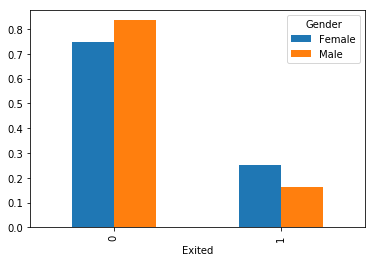

In [131]:
gender_churn = pd.crosstab(churn_data['Exited'],churn_data['Gender'])
print(gender_churn)
gender_churn_percent=gender_churn/gender_churn.sum(axis=0)
print(gender_churn_percent)
gender_churn_percent.plot(kind='bar')
plt.show()

Female has slighly high rate of churning.

From the above ,we can infer that there is no bias in churn based on gender but male has little high tendency to churn  than women by 10%

HasCrCard     0     1
Exited               
0          2332  5631
1           613  1424
HasCrCard         0         1
Exited                       
0          0.791851  0.798157
1          0.208149  0.201843


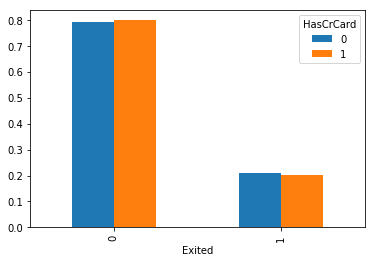

In [3]:
credit_churn = pd.crosstab(churn_data['Exited'],churn_data['HasCrCard'])
print(credit_churn)
credit_churn_percent=credit_churn/credit_churn.sum(axis=0)
print(credit_churn_percent)
credit_churn_percent.plot(kind='bar')
plt.show()

There is no dependency between the creditcard and churning.

HasCrCard     0     1
Gender               
Female     1351  3192
Male       1594  3863
HasCrCard         0         1
Gender                       
Female     0.458744  0.452445
Male       0.541256  0.547555


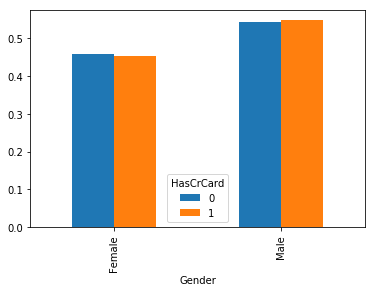

In [104]:
credit_gender = pd.crosstab(churn_data['Gender'],churn_data['HasCrCard'])
print(credit_gender)
credit_gender_percent=credit_gender/credit_gender.sum(axis=0)
print(credit_gender_percent)
credit_gender_percent.plot(kind='bar')
plt.show()

There is no significance relation between gender and has a credit card.

IsActiveMember     0     1
Exited                    
0               3547  4416
1               1302   735
IsActiveMember         0         1
Exited                            
0               0.731491  0.857309
1               0.268509  0.142691


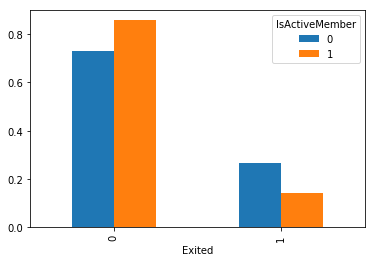

In [106]:
act_churn = pd.crosstab(churn_data['Exited'],churn_data['IsActiveMember'])
print(act_churn)
act_churn_percent=act_churn/act_churn.sum(axis=0)
print(act_churn_percent)
act_churn_percent.plot(kind='bar')
plt.show()

The person who is not active churns more than the active person

NumOfProducts     1     2    3   4
Exited                            
0              3675  4242   46   0
1              1409   348  220  60
NumOfProducts         1         2         3    4
Exited                                          
0              0.722856  0.924183  0.172932  0.0
1              0.277144  0.075817  0.827068  1.0


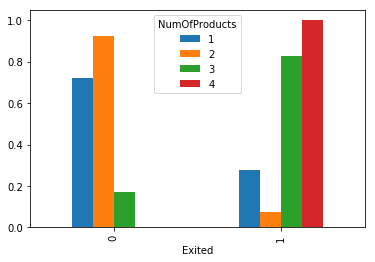

In [130]:
prod_churn = pd.crosstab(churn_data['Exited'],churn_data['NumOfProducts'])
print(prod_churn)
prod_churn_percent=prod_churn/prod_churn.sum(axis=0)
print(prod_churn_percent)
prod_churn_percent.plot(kind='bar')
plt.show()

From the number of product it is clear that people using 4 product is always churning,followed by people of 3.
people using 2 products has less percentage of churning.

We can use encoding for age to check teh relation between age and churn rate

In [80]:
churn_data.loc[churn_data['Age'] < 20, 'age_cat'] = "below 20"
churn_data.loc[(churn_data['Age'] < 40) & (churn_data['Age'] > 19) , 'age_cat'] = "20 -40"
churn_data.loc[(churn_data['Age'] < 55) &  (churn_data['Age'] > 39), 'age_cat'] = "40-55"
churn_data.loc[churn_data['Age'] > 54, 'age_cat'] = "above 55"

age_cat  20 -40  40-55  above 55  below 20
Exited                                    
0          5344   2033       540        46
1           594   1098       342         3
age_cat    20 -40     40-55  above 55  below 20
Exited                                         
0        0.899966  0.649313  0.612245  0.938776
1        0.100034  0.350687  0.387755  0.061224


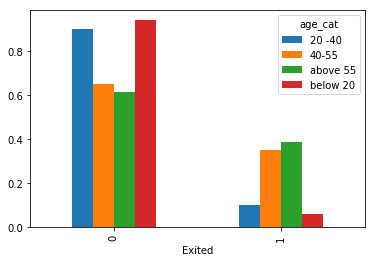

In [81]:
age_churn = pd.crosstab(churn_data['Exited'],churn_data['age_cat'])
print(age_churn)
age_churn_percent=age_churn/age_churn.sum(axis=0)
print(age_churn_percent)
age_churn_percent.plot(kind='bar')
plt.show()

From the above cross table it is people above 55 years tend to churn more and people below 20 year have very less chance to churn also people between 20-40 has very less chance to churn

Gender  Female                           Male                        
age_cat 20 -40 40-55 above 55 below 20 20 -40 40-55 above 55 below 20
Exited                                                               
0         2280   883      229       12   3064  1150      311       34
1          341   600      197        1    253   498      145        2
Gender     Female                                    Male                      \
age_cat    20 -40     40-55  above 55  below 20    20 -40     40-55  above 55   
Exited                                                                          
0        0.869897  0.595415  0.537559  0.923077  0.923726  0.697816  0.682018   
1        0.130103  0.404585  0.462441  0.076923  0.076274  0.302184  0.317982   

Gender             
age_cat  below 20  
Exited             
0        0.944444  
1        0.055556  


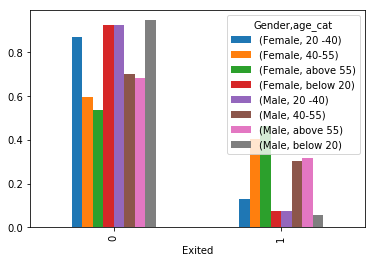

In [84]:
age_gen_churn = pd.crosstab(churn_data['Exited'],[churn_data['Gender'],churn_data['age_cat']])
print(age_gen_churn)
age_gen_churn_percent=age_gen_churn/age_gen_churn.sum(axis=0)
print(age_gen_churn_percent)


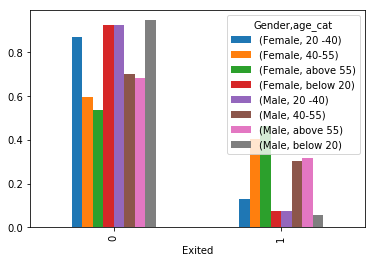

In [85]:
plt.figure(figsize=(20,8))
age_gen_churn_percent.plot(kind='bar')
plt.show()

Male below 20 has very less chance to churn,Female above 55 has very high chance to churn followed by female 40-55.
Male 40-55 has greater chance to churn in male category followed by male above 55.
Female below 20 and male 20-40 has same churn probablity.

selectKBest is a way ofidentifying which attribute has more contribution towards the  target variable.

In [116]:
X=churn_data.iloc[:,[3,6,8,9,10,11,12]] 
y=churn_data.iloc[:,-1]
bestfeatures = SelectKBest(k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

             Specs       Score
1              Age  886.063275
5   IsActiveMember  249.800794
2          Balance  142.473832
3    NumOfProducts   22.915223
0      CreditScore    7.344522
6  EstimatedSalary    1.463262
4        HasCrCard    0.509401


By creating a correlation heat map we can easily find the relation between the feature .It is useful to understad  which feature has more correlation with the target and also to remove the independent features which are very highly correlated with other.

In [121]:
k=churn_data.corr()
print(k)

                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067   

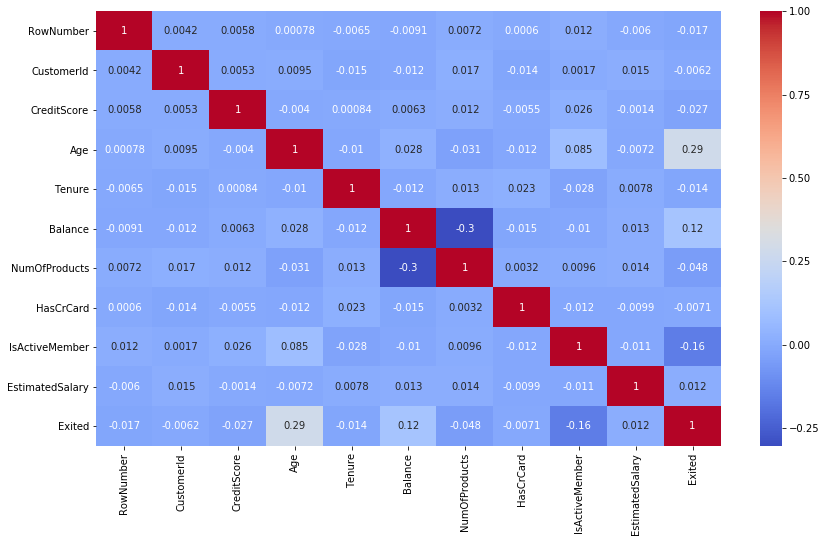

In [129]:
plt.figure(figsize=(14,8))
sns.heatmap(churn_data.corr(),annot=True,cmap='coolwarm')
plt.show()

From the heat map it is observed that Age has the maximum correlation with the target column